## Homework 8, Exercise 2

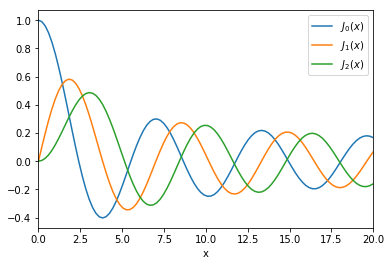

In [1]:
%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# (i) Bessel function calculation using Simpson's rule
def J(m, x):
    
    # I defined the integrand inside of the definition of J(m, x)
    def integrand(theta):
        return np.cos(m*theta - x*np.sin(theta))
    
    # Simpson's rule implementation same as in the lectures
    thetaMin = 0
    thetaMax = np.pi

    numberSteps = 1000
    binWidth = (thetaMax - thetaMin)/float(numberSteps)
    
    result = integrand(thetaMin) + integrand(thetaMax)
    thetai = thetaMin
    
    for i in range(numberSteps-1):
        thetai = thetai + binWidth
        factor = 2
        if i%2==0:
            factor = 4
        result += integrand(thetai)*factor

    return result*binWidth/(3.*np.pi)

# plotting the results
x = np.linspace(0,20,100)

plt.plot(x, J(0,x), label = r'$J_0(x)$')
plt.plot(x, J(1,x), label = r'$J_1(x)$')
plt.plot(x, J(2,x), label = r'$J_2(x)$')
plt.legend(loc = 'upper right')
plt.xlabel('x')
plt.xlim(0, 20)
plt.show()

In [2]:
# (ii) density plot of the diffraction pattern

k = 2*np.pi/500e-9
x = np.linspace(-1e-6,1e-6,100)
y = np.linspace(-1e-6,1e-6,100)
X,Y = np.meshgrid(x,y)

def radius(x, y):
    return np.sqrt(x*x + y*y)

def I(r):
    if r == 0:
        return 0.5
    else:
        return (J(1,k*r)/(k*r))**2
   
pattern = np.zeros((len(x),len(y)))

for i in range(len(X)):
    for j in range(len(X)):
        pattern[i][j]=I(radius(X[i][j],Y[i][j]))

# the code below would also work, if we didn't have the if statement in the function definition
# pattern = I(radius(X,Y))

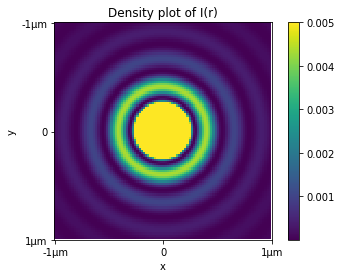

In [3]:
plt.imshow(pattern, vmax = 0.005)
plt.colorbar()
plt.title("Density plot of I(r)")
plt.xlabel("x")
plt.ylabel("y")
plt.xticks(np.linspace(0,100,3),('-1μm','0','1μm'))
plt.yticks(np.linspace(0,100,3),('-1μm','0','1μm'))
plt.show()

## Exercise 3

(i) With the substitution $x = \hbar\omega/k_BT$ (see also Homework 5, Exercise 2, where we did a similar substitution) we obtain

$$W = \int_0^\infty I(\omega)d\omega = \frac{\hbar}{4\pi^2c^2}\int_0^\infty \frac{\omega^3}{e^{\hbar\omega/k_BT}-1}d\omega = \frac{k_b^4T^4}{4\pi^2c^2\hbar^3}\int_0^\infty\frac{x^3}{e^x-1}dx$$

(ii) We learned several methods to evaluate infinite integrals. First let's plot the integrand to see how it behaves at large $x$

C:\Users\Dino the Dino\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


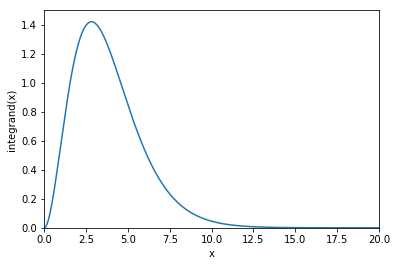

In [4]:
def integrand(x):
    return x**3/(np.exp(x)-1)

xmax = 20
x = np.arange(0,xmax,0.01)
plt.plot(x,integrand(x))
plt.xlim(0,xmax)
plt.ylim(0,1.5)
plt.xlabel("x")
plt.ylabel("integrand(x)")
plt.show()

It seems that it should be safe to cut off the upper limit around $x=20$. We can try different cutoffs to estimate the error associated with this. Also the function is very smooth, so Gaussian quadrature should work well. To avoid overflow in the denominator due to large values of $e^x$ we can rewrite the integrand as

$$\frac{x^3e^{-x}}{1-e^{-x}}$$

Remember that we used a similar trick also in Homework 5.

In [5]:
import scipy.integrate as integrate

def integrand_mod(x):
    return x**3*np.exp(-x)/(1-np.exp(-x))

# Gaussian quadrature
int20 = integrate.quadrature(integrand_mod, 0, 20, args=())
int40 = integrate.quadrature(integrand_mod, 0, 40, args=())

print(int20)
print(int40)
print("Relative error: ", abs(int40[0]-int20[0])/int40[0])
print("Absolute error: ", abs(int40[0]-int20[0]))

(6.493920200189986, 5.976715389266474e-08)
(6.493939460296137, 3.7434588762153e-09)
Relative error:  2.9658585931506616e-06
Absolute error:  1.926010615171947e-05


The most accurate estimate is 6.49394(2). The error due to the finite cut-off (here estimated very conservatively to be the difference between the two integrals) is much larger than the error on the numerical integration.

(iii) Estimating the Stefan-Boltzmann constant

In [6]:
from scipy.constants import hbar, c, k

print("The Stefan-Boltzmann constant equals %.3g" % (k**4/4/np.pi**2/c**2/hbar**3*int40[0]), 'W/m^2/K^4')

The Stefan-Boltzmann constant equals 5.67e-08 W/m^2/K^4


Very good agreement with the known value!